#Pytorch Toy Project 3

Make our own customized network & performance up! _ by imjjun(KUBIG 16th)



---


On this notebook, we would make our own network through 2 ways: nn.Sequential & line-by-line. Each has advantages & disadvantages. So you could choose your own way to implement your network!

In [ ]:
import torch
import torch.nn as nn

torch.manual_seed(1)

In [ ]:
if torch.cuda.is_available(): device=torch.device('cuda')
print(device)
#Make sure that your runtime must be 'GPU'
#Print out CUDA clearly
#If not, this task must be really time-consuming

cuda


In [ ]:
#Same Data with Week 2!
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

#This line is for transformation of Image. You don't need to consider about it.
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5),(0.5))])

#Train data download
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

#Test data download
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

#Make dataloader for iteration when training
#would be covered on next toy project
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

#1 How to make your network

*If you fix the torch's seed, you would get very similiar result.

In [ ]:
#nn.Sequential

class Customnet1(nn.Module):
  """Define your network by using nn.Sequential. Primarily, this network should be inherited by nn.Module from torch.nn
     There are two functions which you have to implement, 1) __init__ & 2) forward

     In __init__, you have to pre-define your layers with dimension. For example, you have to decide the kernel size of Convolution layer, or the size of weight of Affine_forward.

     In forward, you should pass your input through your network. You can use the network, which is pre-defined in __init__. Or make some creative operations which couldn't be implemented in __init__.


  """
  def __init__(self):
    #Intialize the nn.Module firstly
    super().__init__()

    #You can contain your layers here
    #nn.conv2d(input_channel, output_channel, kernel_size, stride, padding, dilation, etc,,,)
    #nn.MaxPool2d(kernel_size, stride, etc,,)
    #The details could be searched in pytorch official docs
    self.layer=nn.Sequential(
                             nn.Conv2d(1,64,(2,2)), #You can control Kernel size, using the tuple like (3,3) or (3,2). The kernel must not be a square.
                             nn.MaxPool2d(4), #This kernel size must also be able to become non-symmetric.
                             nn.ReLU(),
                             nn.Conv2d(64,64,(2,2)),
                             nn.MaxPool2d(4),
                             nn.ReLU(),
                             nn.Flatten(),
                             nn.Linear(64, 10), # In_channel, Output Channel
                             nn.Softmax())
  #As you can see, nn.Sequential is a very comfortable function because that method wraps the whole layers! Just passing through the layer makes us design the network.
  #This

  #forwad has two variables: (self, x)
  # x is the 'input' which is passed from the DataLoader
  # This process is fully automatic so that you don't need to consider any other things.
  def forward(self, x):

    x=self.layer(x)

    return x

In [ ]:
# line-by-line
# Not using the nn.Sequential, you can define whole layers line-by-line

class Customnet2(nn.Module):
  """The main principle is same with above.

  """
  def __init__(self):

    super().__init__()

    #Define whole layers individually
    self.conv1=nn.Conv2d(1,64,(2,2))
    self.conv2=nn.Conv2d(64,64,(2,2))
    self.maxpool=nn.MaxPool2d(4)
    self.relu=nn.ReLU()
    self.flatten=nn.Flatten()
    self.linear=nn.Linear(64,10)
    self.softmax=nn.Softmax()

  def forward(self, x):
    #forward should be complicated compared to nn.Sequential's one
    #You can add some operations which are not included in nn.Module
    #For example, if you want to print out the shape of x, you can add the line in this Class.
    #But regretfully, since nn.Sequential does not contain the print method,  you cannot print out the shape of x if you use the nn.Sequential

    x=self.conv1(x)
    x=self.maxpool(x)
    x=self.relu(x)
    x=self.conv2(x)
    x=self.maxpool(x)
    x=self.relu(x)

    x=self.flatten(x)
    x=self.linear(x)
    x=self.softmax(x)

    return x


**Recap**

We just have learned about learning rate, loss function & Optimizer! We have to pre-define them before training. Use your own code to pre-define them.

### Customnet1

In [ ]:
#model
model=Customnet1().to(device) #You can load your model on GPU!

#learning rate
learning_rate=1e-4

#epoch
epoch=10

#Loss function
loss=nn.CrossEntropyLoss()

#Optimizer
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
#Same with pytorch project 1
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):

        pred = model(X.to(device)) #Also load the input on GPU
        loss = loss_fn(pred.cpu(), y) #Detach your predicted result on CPU #Loss could be calculated on CPU


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
#Same with pytorch project 1
def test_loop(dataloader, model, loss_fn):

    model.eval() #test mode
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0



    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.to(device))
            test_loss += loss_fn(pred.cpu(), y).item()
            correct += (pred.cpu().argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
for t in range(epoch):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss, optimizer)
    test_loop(test_dataloader, model, loss)
print("Done!")

###Customnet2

Very similiar result with Customnet1 because two networks are originally identical!

In [ ]:
#model
model=Customnet2().to(device) #You can load your model on GPU!

#learning rate
learning_rate=1e-4

#epoch
epoch=10

#Loss function
loss=nn.CrossEntropyLoss()

#Optimizer
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for t in range(epoch):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss, optimizer)
    test_loop(test_dataloader, model, loss)
print("Done!")

In [ ]:
#So, many people use the mixed way like below:

class Customnet3(nn.Module):
  """The main principle is same with above.

  """
  def __init__(self):

    super().__init__()

    #More simpler than line-by-line but still intuitive to revise
    #Making blocks!
    self.conv1=nn.Sequential(nn.Conv2d(1,64,(2,2)),
                             nn.MaxPool(4),
                             nn.ReLU())
    self.conv2=nn.Sequential(nn.Conv2d(64,64,(2,2)),
                             nn.MaxPool(4),
                             nn.ReLU())
    self.flatten=nn.Flatten()
    self.linear=nn.Sequential(nn.Linear(64,10),
                              nn.Softmax())


  def forward(self, x):

    #More simpler than line-by-line forward

    x=self.conv1(x)
    x=self.conv2(x)
    x=self.flatten(x)
    x=self.linear(x)

    return x

#2 Implementation of Alexnet

Since you have learned how to make our own network, then you can make the Alexnet, which was taught in our session.

Alexnet has a relatively simple structure, compared to other networks such as GoogLeNet or Resnet but still powerful.

Our task is the development of Alexnet using the above method. We should have used the Imagenet dataset, same with Alexnet's one but ImageNet dataset is so huge and pytorch doesn't even support this dataset now.

-> We would use the smaller one, CIFAR100 which has 100 categories for classification task.

Enjoy your implementation, and feel free to ask!

*Don't worry too much. You will handle some Natural Language processing tasks from NEXT WEEK.

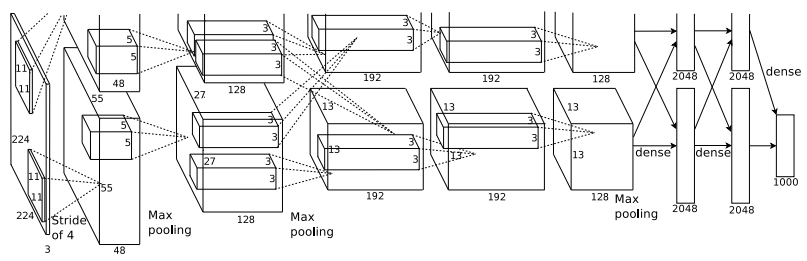

\*Hint: As mentioned, The Convolution layers of Alexnet is separated because of the GPU size but we don't consider it on this notebook. Also, you have to reduce the size of output, since we have only 100 categories.

Ex) For the first layer of Alexnet, we would use 96 filters, not dividing them 48 & 48 as paper authors had used.

\*Refer to this paper: https://papers.nips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

In [ ]:
import torchvision



transform = transforms.Compose([
    transforms.Resize((227, 227)), #Size is different with original paper, since we have to obtain 55*55 feature maps after 1st convolution layers
                                   #224*224 images do not lead to 55*55 feature maps
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


#Use CIFAR100, instead of ImageNet Dataset
trainset = torchvision.datasets.CIFAR100('./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR100('./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


In [ ]:
#Implementation of AlexNet

class Alexnet(nn.Module):

  """Torch implementation of Alexnet

  Inputs
  - images with [B,C,H,W] => (Batch_size, 3, 227, 227)

  Outputs:
  - Class probabilities with [Categories,] => (100,)
  """

  def __init__(self):

    pass


  def forward(self, x):

    pass

In [ ]:
#model
model=Alexnet().to(device)

#learning rate

#epoch

#Loss function

#Optimizer


In [ ]:
#Enjoy Your Training
#Good Job :)
for t in range(epoch):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss, optimizer)
    test_loop(test_dataloader, model, loss)
print("Done!")